### PyGMT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FormatStrFormatter
from tqdm import tqdm
import scipy
import obspy.signal.filter
from obspy.signal.trigger import classic_sta_lta, recursive_sta_lta,carl_sta_trig,delayed_sta_lta
import pygmt

## Load stations

In [3]:
#Load stations
# rawdata_Stations = pd.read_csv('/egg0/s2/zul311/Geothermal/NNLoc/staInfo_df_DFS.csv')
rawdata_Stations = pd.read_csv('data/stations/staInfo_df_corrected.csv')

rawdata_Stations = rawdata_Stations.rename(columns={'Unnamed: 0':'number'})
rawdata_Stations['number'] = rawdata_Stations['number'].astype(str)
rawdata_Stations_all = np.stack((rawdata_Stations.lat,rawdata_Stations.lon,rawdata_Stations.depth),axis=1)
rawdata_Stations_bh = rawdata_Stations_all[-8:]
#Load original reference 2012-2014
Data_2012_2013  = pd.read_csv('data/raw_MEQs/evtDict_NewBerry_2012.csv')
Data_2014  = pd.read_csv('data/raw_MEQs/evtDict_NewBerry_2014.csv')

ev_2012_2013 = np.stack((Data_2012_2013.evLat,Data_2012_2013.evLng,Data_2012_2013.evDp),axis=1)
ev_2014 = np.stack((Data_2014.evLat,Data_2014.evLng,Data_2014.evDp),axis=1)
ev_2012_2014 = np.concatenate((ev_2012_2013,ev_2014),axis=0)


In [4]:
#### above borehole
print(np.max(rawdata_Stations_bh[:,2]))

1.695


In [5]:
## Remove the ones above borehole stations
clean_ev_2012_2013 = ev_2012_2013[ev_2012_2013[:,2]<1.695]
clean_ev_2014 = ev_2014[ev_2014[:,2]<1.695]

print(clean_ev_2012_2013.shape)
print(clean_ev_2014.shape)

(144, 3)
(338, 3)


In [6]:
# Set the region
region = [
    rawdata_Stations.lon.min() - 0.04,
    rawdata_Stations.lon.max() + 0.04,
    rawdata_Stations.lat.min() - 0.03,
    rawdata_Stations.lat.max() + 0.03,
]


grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 1x1 arc seconds tiles provided by SRTMGL1 (land only) [NASA/USGS].
grdblend [NOTICE]:   -> Download 1x1 degree grid tile (earth_relief_01s_g): N43W122


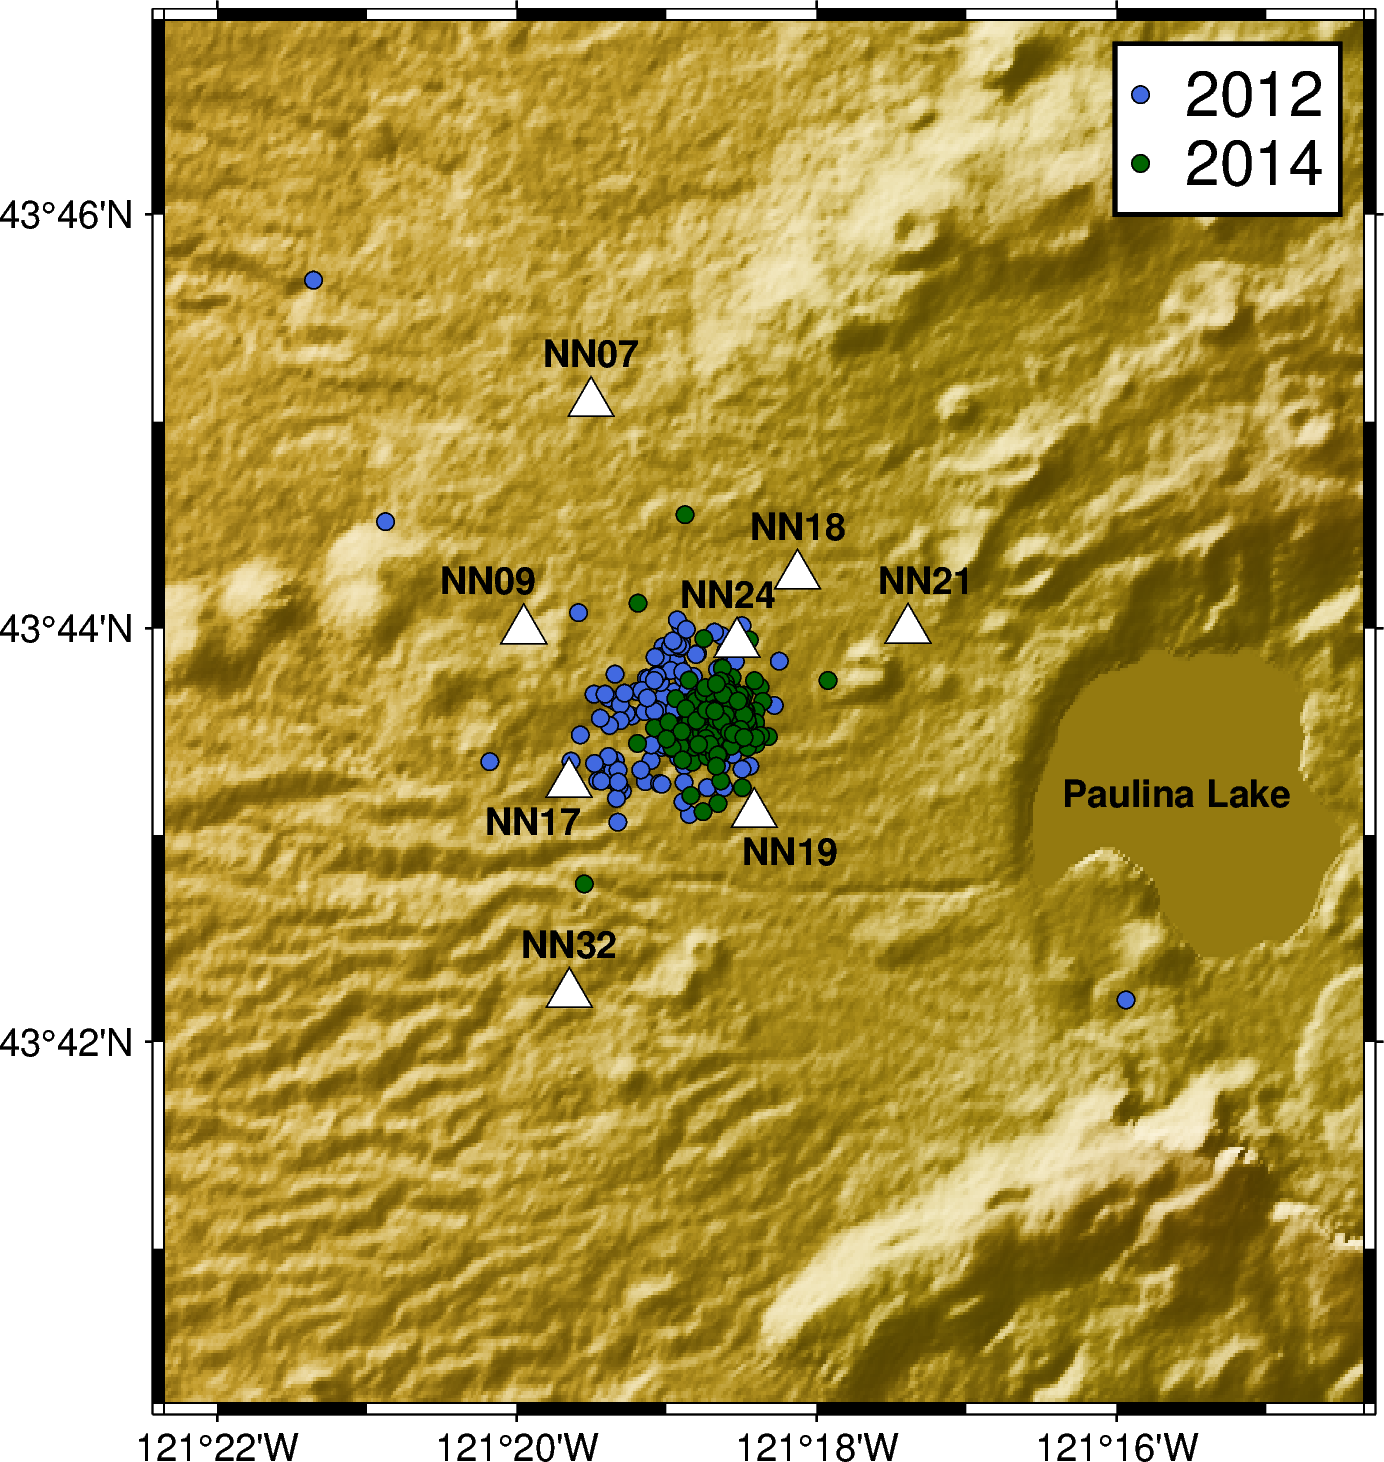

In [7]:
# pygmt.config(FONT_ANNOT_PRIMARY='25p')

fig = pygmt.Figure()
pygmt.makecpt(
    cmap='etopo1',
    series='-8000/5000/1000',
    continuous=True
)

# define etopo data file
topo_data = "@earth_relief_01s"
# plot high res topography
fig.grdimage(
    grid=topo_data,
    region=region,
    projection='M4i',
    shading=True,
    frame=True
)
# fig.coast(shorelines=True, frame=True)
# colorbar colormap
pygmt.makecpt(cmap="geo", series=[
              rawdata_Stations.depth.min(), rawdata_Stations.depth.max()])

fig.plot(x=clean_ev_2012_2013[:,1], y=clean_ev_2012_2013[:,0], style="c0.15c", fill="royalblue", pen="black",label='2012')
fig.plot(x=clean_ev_2014[:,1], y=clean_ev_2014[:,0], style="c0.15c", fill="darkgreen", pen="black",label='2014')
# fig.plot(x=rawdata_Stations.lon, y=rawdata_Stations.lat, style="t0.45c", fill="white", pen="black")
fig.plot(x=rawdata_Stations_bh[:,1], y=rawdata_Stations_bh[:,0], style="t0.45c", fill="white", pen="black")

fig.text(text="Paulina Lake", x=-121.26, y=43.72,font="9p,Helvetica-Bold,black")

fig.text(text="NN07", x=-121.325081, y=43.751469+0.004,font="9p,Helvetica-Bold,black")
fig.text(text="NN09", x=-121.332558-0.004, y=43.733158+0.004,font="9p,Helvetica-Bold,black")
fig.text(text="NN17", x=-121.327538-0.004, y=43.720772-0.003,font="9p,Helvetica-Bold,black")
fig.text(text="NN18", x=-121.302132, y=43.737560+0.004,font="9p,Helvetica-Bold,black")
fig.text(text="NN19", x=-121.306953+0.004, y=43.718330-0.003,font="9p,Helvetica-Bold,black")
fig.text(text="NN21", x=-121.289864+0.002, y=43.733189+0.004,font="9p,Helvetica-Bold,black")
fig.text(text="NN24", x=-121.308868-0.001, y=43.732052+0.004,font="9p,Helvetica-Bold,black")
fig.text(text="NN32", x=-121.327499, y=43.703850+0.004,font="9p,Helvetica-Bold,black")


# fig.legend()
with pygmt.config(FONT_ANNOT_PRIMARY="15p"):
    fig.legend()

fig.show()
# fig.savefig('Figures/1-Site_Map_Overview.jpg',dpi=300)
